# Corporate Investment and Tax Rate Comaprison

[This blog post](http://behindthenumbers.ca/2018/11/21/corporate-tax-cuts-enrich-shareholders-not-competitiveness/) by Behind the Numbers piqued my interest. The author only delved into machinery and equipment investment in comparison to corporate tax rates, but I felt that the generally declining manufacturing base in North America may have had an influence here. I wanted to also include intellectual property investment in the analysis as well. The result is this notebook.

### Sources

* [OECD Stat](https://stats.oecd.org/index.aspx?DataSetCode=TABLE_II1#) for the corporate tax rate data

* [StatsCan](https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=3610010401) for the corporate investment data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [17]:
data = pd.read_csv('data.csv', index_col=0)
data = data.drop(data.columns[[0, 1, 2, 3, 4, 5, 6]], axis=1) 
data.head()

,Corporate Tax Rate,Machinery and Equipment Investment,Intellectual Property Investment,Building Investment
Reference period,,,,
Q1 2000,0.2912,0.265725,0.112240,0.285215
Q2 2000,0.2912,0.266897,0.120158,0.274744
Q3 2000,0.2912,0.264903,0.123821,0.264236
Q4 2000,0.2912,0.256914,0.129561,0.265914
Q1 2001,0.2812,0.248603,0.134796,0.271367


In [53]:
new_index = []
for q in data.index.values:
    if q[:2] == 'Q1':
        q = q[3:] + '-01-01'
        new_index.append(q)
    if q[:2] == 'Q2':
        q = q[3:] + '-04-01'
        new_index.append(q)
    if q[:2] == 'Q3':
        q = q[3:] + '-07-01'
        new_index.append(q)
    if q[:2] == 'Q4':
        q = q[3:] + '-10-01'
        new_index.append(q)
        
data['reference_period'] = new_index
data = data.set_index('reference_period')
data.head()

,Corporate Tax Rate,Machinery and Equipment Investment,Intellectual Property Investment,Building Investment
reference_period,,,,
2000-01-01,0.2912,0.265725,0.112240,0.285215
2000-04-01,0.2912,0.266897,0.120158,0.274744
2000-07-01,0.2912,0.264903,0.123821,0.264236
2000-10-01,0.2912,0.256914,0.129561,0.265914
2001-01-01,0.2812,0.248603,0.134796,0.271367


## Analysis

In [54]:
import pyflux as pf

----
----
Normal ARIMA(4,0,4)                                                                                       
======================================================= ==================================================
Dependent Variable: Machinery and Equipment Investment  Method: MLE                                       
Start Date: 2001-01-01                                  Log Likelihood: 279.7171                          
End Date: 2018-04-01                                    AIC: -539.4343                                    
Number of observations: 70                              BIC: -516.9493                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0987     0.0187     5.2739   0.0      (0.062 | 0.1354)         
AR(1)                      

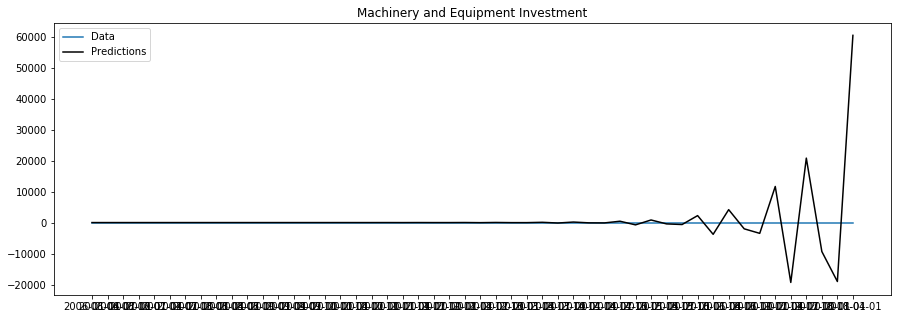

----
Normal ARIMA(4,0,4)                                                                                       
======================================================= ==================================================
Dependent Variable: Intellectual Property Investment    Method: MLE                                       
Start Date: 2001-01-01                                  Log Likelihood: 321.3044                          
End Date: 2018-04-01                                    AIC: -622.6088                                    
Number of observations: 70                              BIC: -600.1239                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0006     0.0004     1.7376   0.0823   (-0.0001 | 0.0013)       
AR(1)                           

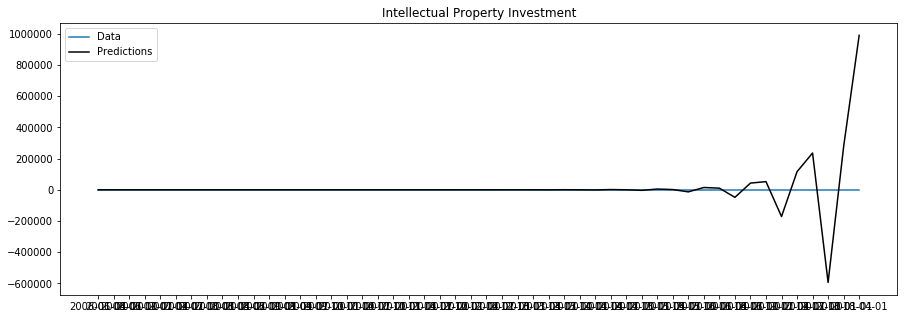

----
Normal ARIMA(4,0,4)                                                                                       
======================================================= ==================================================
Dependent Variable: Building Investment                 Method: MLE                                       
Start Date: 2001-01-01                                  Log Likelihood: 253.0779                          
End Date: 2018-04-01                                    AIC: -486.1557                                    
Number of observations: 70                              BIC: -463.6708                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0161     0.0151     1.0726   0.2835   (-0.0134 | 0.0456)       
AR(1)                           

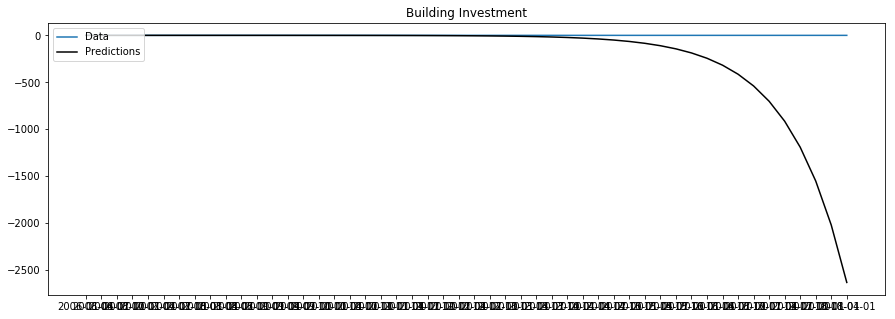

In [55]:

for index, column in enumerate(data.columns):
    print('----')
    if index != 0:
        drop_list = [1, 2, 3]
        drop_list.remove(index)
        model_data = data.drop(data.columns[drop_list], axis=1) 
        model = pf.ARIMA(data=model_data, ar=4, ma=4, target=column, family=pf.Normal())
        x = model.fit("MLE")
        x.summary()
        model.plot_predict_is(h=50, figsize=(15,5))

In [58]:
for index, column in enumerate(data.columns):
    print('----')
    if index != 0:
        x = [list(data['Corporate Tax Rate']), list(data[column])]
        print(np.corrcoef(x))

----
----
[[1.         0.58803211]
 [0.58803211 1.        ]]
----
[[1.         0.86910057]
 [0.86910057 1.        ]]
----
[[ 1.         -0.73267209]
 [-0.73267209  1.        ]]


In [61]:
import statsmodels.tsa as tsa